In [1]:
# import des bibliothèque
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA


# We'll also import seaborn, a Python graphing library
import warnings # current verimport matplotlib.pyplot as pltsion of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)

In [2]:
# lecture des données
filename = "covtype.data"
data = pd.read_csv(filename,sep=",")
data.head(10)


,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
5,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
6,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
7,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
8,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5
9,2612,201,4,180,51,735,218,243,161,6222,...,0,0,0,0,0,0,0,0,0,5


In [35]:
'''print(data.iloc[0][0])
print(data.iloc[0][1])
print(data.iloc[0][2])
print(data.iloc[0][54])
print(data.iloc[1][54])
print(data.iloc[2][54])
print(data.iloc[3][54])'''

#data

'print(data.iloc[0][0])\nprint(data.iloc[0][1])\nprint(data.iloc[0][2])\nprint(data.iloc[0][54])\nprint(data.iloc[1][54])\nprint(data.iloc[2][54])\nprint(data.iloc[3][54])'

In [6]:
data.__class__

pandas.core.frame.DataFrame

In [33]:
data.columns

Index(['2596', '51', '3', '258', '0', '510', '221', '232', '148', '6279', '1',
       '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10',
       '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '1.1', '0.32', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '5'],
      dtype='object')

In [5]:
information = data.columns
print(int(information[0])/10)
print("lenght",len(information))
inf = [""]*54
for i in range(0,11):
    inf[i]= int(information[i])
print(inf)

ValueError: invalid literal for int() with base 10: 'Elevation'

In [3]:

inf=[""]*55
names=["Elevation","Aspect","Slope",
       "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
       "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm",
       "Horizontal_Distance_To_Fire_Points",'Wilderness_Area_1','Wilderness_Area_2',
       'Wilderness_Area_3','Wilderness_Area_4']
inf[0:len(names)]=names
print(len(names))       
sole_type=[]
    
for i in range(len(names),54):
    val = "Soil_Type_"+str(i-len(names)+1)
    inf[i]=val
    sole_type.append(val)
inf[54]="Cover_Type"
#print(sole_type)       
#print(inf)

14


In [4]:
data.columns = inf

In [5]:
data.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [6]:
y = data["Cover_Type"]
X = data.drop(["Cover_Type"],axis=1)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


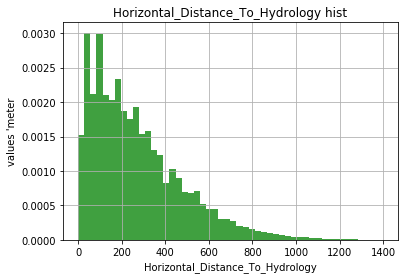

In [8]:
# the histogram of the data
n, bins, patches = plt.hist(X["Horizontal_Distance_To_Hydrology"], 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Horizontal_Distance_To_Hydrology')
plt.ylabel("values 'meter")
plt.title("Horizontal_Distance_To_Hydrology hist")
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

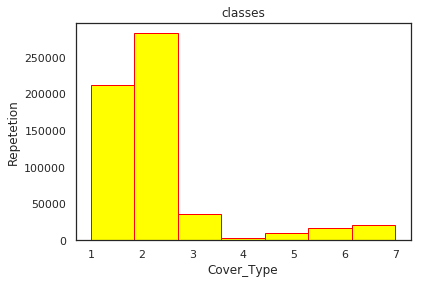

In [7]:
plt.hist(y, range = (1, 7), bins = 7, color = 'yellow',
            edgecolor = 'red')
plt.xlabel('Cover_Type')
plt.ylabel('Repetetion')
plt.title('classes')
plt.show()

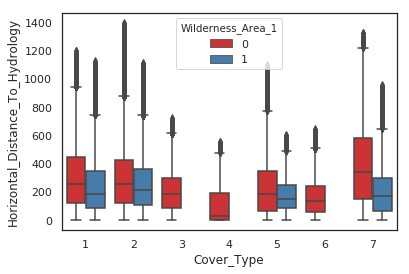

In [15]:
# boxplot

# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
#X.plot(kind="scatter", x="Wilderness_Area_1", y="Cover_Type")
# Grouped boxplot
sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Hydrology", hue="Wilderness_Area_1", data=data, palette="Set1")



In [1]:
names=["Elevation","Aspect","Slope",
       "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
       "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm",
       "Horizontal_Distance_To_Fire_Points",'Wilderness_Area_1','Wilderness_Area_2',
       'Wilderness_Area_3','Wilderness_Area_4']

#todrop.append()
xscatter = data.drop(sole_type,axis=1)
xscatter.head(3)
# without regression
sns.pairplot(xscatter, kind="scatter")


NameError: name 'sole_type' is not defined

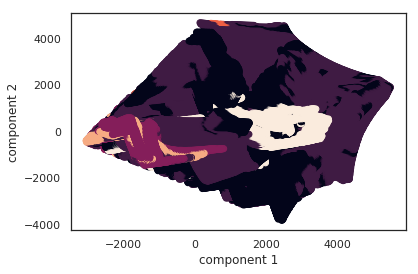

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

In [27]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)

#### ######

plt.scatter(projected[:, 0], projected[:, 1],
            c=y)# cmap=plt.cm.get_cmap('spectral', 10),edgecolor='none', alpha=0.5
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()
plt.colorbar()

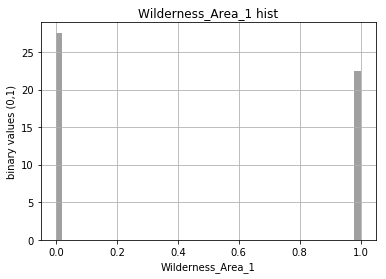

In [13]:
# the histogram of the data
n, bins, patches = plt.hist(X["Wilderness_Area_1"], 50, normed=1, facecolor='grey', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Wilderness_Area_1')
plt.ylabel("binary values (0,1)")
plt.title("Wilderness_Area_1 hist")
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

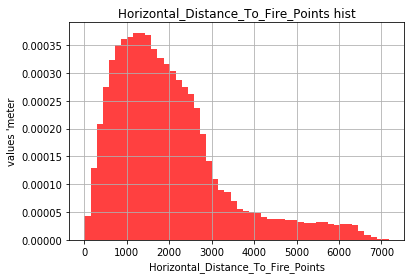

In [12]:
# the histogram of the data
n, bins, patches = plt.hist(X["Horizontal_Distance_To_Fire_Points"], 50, normed=1, facecolor='red', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Horizontal_Distance_To_Fire_Points')
plt.ylabel("values 'meter")
plt.title("Horizontal_Distance_To_Fire_Points hist")
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

In [ ]:
# the histogram of the data
n, bins, patches = plt.hist(X["Horizontal_Distance_To_Fire_Points"], 50, normed=1, facecolor='red', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Horizontal_Distance_To_Fire_Points')
plt.ylabel("values 'meter")
plt.title("Horizontal_Distance_To_Fire_Points hist")
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

In [9]:
# PCA pour une première visualisation des données
pca = PCA(n_components=2)
pca.fit(X)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a scatter plot of the the projection
plt.scatter(X[:,0],X[:,1])

p
'''

plt.savefig("2dimensions_with_out_codes.png")
plt.show()


